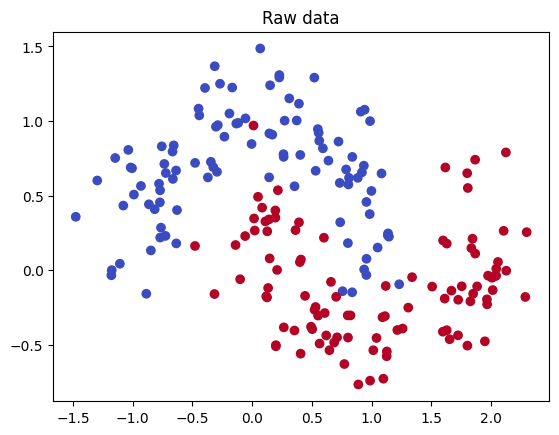

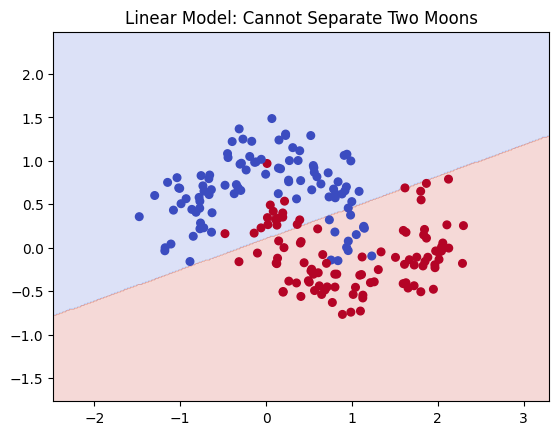

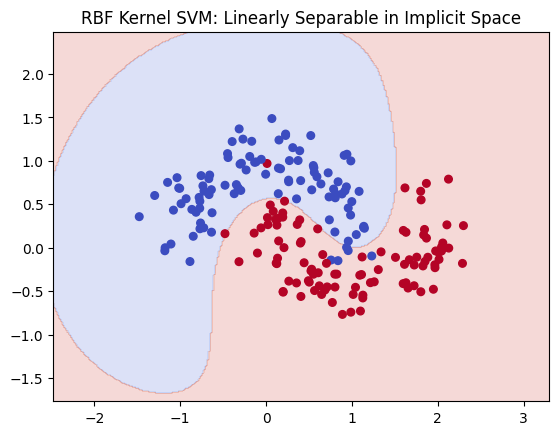

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 生成非线性可分的数据集
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# 画原始数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Raw data")
plt.show()

# 1. 原始空间 + 线性模型
clf_linear = LogisticRegression()
clf_linear.fit(X, y)

# 2. 使用 RBF 核的核方法（隐式映射）
clf_rbf = SVC(kernel='rbf', gamma=1.0)
clf_rbf.fit(X, y)

# 可视化函数决策边界
def plot_decision_boundary(clf, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
    plt.title(title)
    plt.show()

plot_decision_boundary(clf_linear, X, y, "Linear Model: Cannot Separate Two Moons")
plot_decision_boundary(clf_rbf, X, y, "RBF Kernel SVM: Linearly Separable in Implicit Space")
